In [ ]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# ignore the warning messages
import warnings
warnings.filterwarnings('ignore')

#Exploratory Data Analysis (EDA)

**Salary Dataset**
- **YearsExperience:** Employee's years of experience.
- **Salary [Target Column]:** Salary in terms of years of experience.




In [ ]:
# Importing dataset
file_link = 'https://drive.google.com/file/d/1z_7EFfGJ42o0JCklJz0K77NTzPa-QynQ/view?usp=sharing'

# get the id part of the file
id = file_link.split("/")[-2]

# creating a new link using the id for better readability of csv file in pandas
new_link = f'https://drive.google.com/uc?id={id}'
df = pd.read_csv(new_link)


X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

# Splitting dataset into train and test set

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 1/3, random_state = 2 )


# Linear Regression
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test,y_pred))

# Ridge
#alpha = L2 regularization (squared value), alpha  is not 0
reg = Ridge(alpha=0.1)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test,y_pred))

# Lasso
#alpha = L1 regularization (absolute value)
reg = Lasso(alpha=0.01)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test,y_pred))

# ElasticNet
#alpha = mult, l1_ratio = sum or combination
reg = ElasticNet(alpha=0.01,l1_ratio=0.9)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test,y_pred))



0.9041801644162628
0.9042534117787511
0.9041801799163933
0.904194904373961


Predicted values  [35413.63 33485.65 66261.31]
Real values       [46205. 39343. 61111.]
Trained W         9639.9
Trained b         22881.76


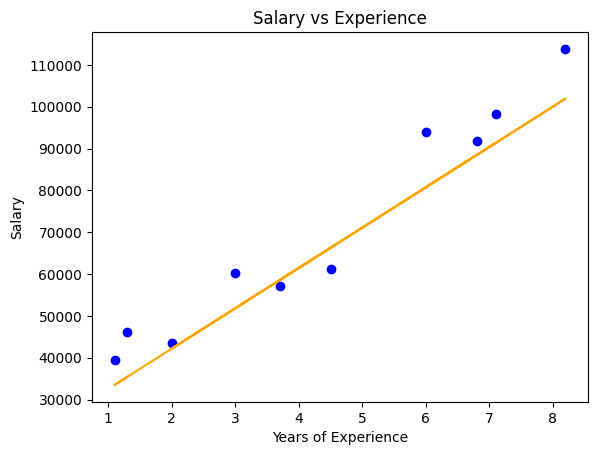

In [ ]:
class ElasticRegression():

    def __init__( self, learning_rate, iterations, l1_penalty, l2_penalty ) :

        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l1_penalty = l1_penalty
        self.l2_penalty = l2_penalty

    # Function for model training
    def fit( self, X, Y ) :

        # no_of_training_examples, no_of_features
        self.m, self.n = X.shape

        # weight initialization
        self.weight = np.zeros( self.n )
        self.bias= 0
        self.X = X
        self.Y = Y
        # use update_weights method to update weights in self.iterations
        for i in range(self.iterations):
            self.update_weights()

    # Helper function to update weights in gradient descent
    def update_weights( self ):
        Y_pred = self.predict( self.X )
        dGradient = np.zeros( self.n )
        db = 0

        # Calculate gradients(Derivation of MSE+Lasso+Ridge)
        for i in range(self.n):
            dGradient[i] = - (2 * (self.X[:, i].dot(self.Y - Y_pred)) + self.l1_penalty * np.sign(self.weight[i]) + 2 * self.l2_penalty * self.weight[i]) / self.m
        db = -2 * np.sum(self.Y - Y_pred) / self.m

        # Update weights because we tend to reduce bias and increase variance
        self.weight -= self.learning_rate * dGradient # to determine which feature is more important
        self.bias-= self.learning_rate * db

    # Hypothetical function h(x)
    def predict( self, X ) :
        return X.dot( self.weight ) + self.bias

# Model training
# Assuming X_train and y_train are provided
# Assuming X_test and y_test are provided for prediction and visualization
model = ElasticRegression(iterations=1000, learning_rate=0.01, l1_penalty=1, l2_penalty=1)
model.fit(X_train, y_train)

# Prediction on test set
Y_pred = model.predict(X_test)

print("Predicted values ", np.round(Y_pred[:3], 2))
print("Real values      ", y_test[:3])
print("Trained W        ", round(model.weight[0], 2))
print("Trained b        ", round(model.bias, 2))

# Visualization on test set
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, Y_pred, color='orange')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

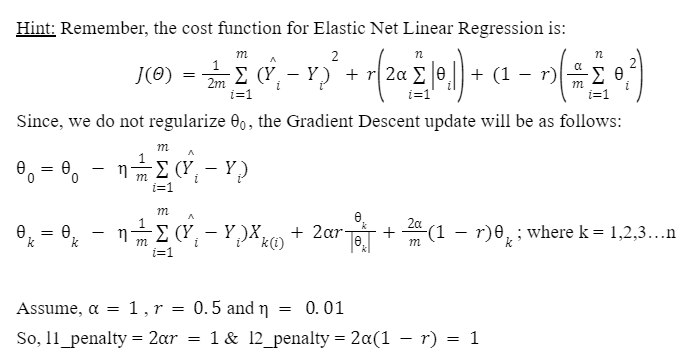

Predicted values  [38563.48 36771.88 67229.14]
Real values       [46205. 39343. 61111.]
Trained coefficients: [8958.01966223]
Trained intercept: 26918.05625402824


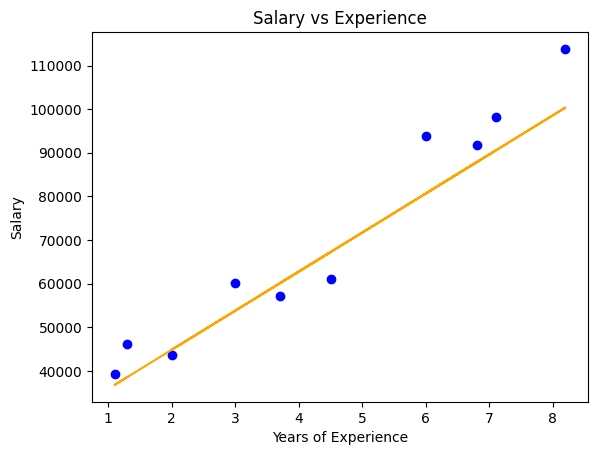

In [ ]:
from sklearn.linear_model import ElasticNet
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train and y_train are provided
# Assuming X_test and y_test are provided for prediction and visualization

# Model training
model = ElasticNet(alpha=1, l1_ratio=0.5, max_iter=1000, tol=0.001)
model.fit(X_train, y_train)

# Prediction on test set
Y_pred = model.predict(X_test)

print("Predicted values ", np.round(Y_pred[:3], 2))
print("Real values      ", y_test[:3])
print("Trained coefficients:", model.coef_)
print("Trained intercept:", model.intercept_)

# Visualization on test set
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, Y_pred, color='orange')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()
